In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot

In [3]:
dataset = pd.read_excel(r'C:\Users\55944\Desktop\888/data_iqr_new1.xlsx')


In [4]:
dataset

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки,"модуль упругости, ГПа"
0,2.699188,2039.344180,116.365766,24.921719,223.057932,697.411809,71.979322,2657.645298,187.868789,0,4.590618,50.328563,2.436909
1,2.920376,2087.646817,76.784021,18.552220,258.302450,68.508119,74.062349,2475.645729,237.850070,0,10.466131,82.525493,4.339154
2,2.403428,2018.959131,59.174654,22.501117,318.192405,108.448229,69.115762,2363.294546,222.307307,0,0.239660,69.153352,9.986210
3,2.752398,1932.046092,122.388881,18.518832,327.516557,384.207155,70.916879,3636.892992,89.825568,0,5.545439,54.604251,11.312943
4,2.717755,2092.178750,48.087114,26.105167,289.494401,8.460317,71.617030,2680.194401,212.637811,0,6.117312,45.541835,21.771994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1.719814,2056.616323,126.109863,21.950931,270.407471,633.390973,71.337572,2811.005983,200.116156,0,1.970764,67.056996,1546.290886
916,5.098993,1977.339047,132.343060,25.397001,286.556431,690.364836,72.341640,1386.578973,271.901394,1,10.000000,57.000000,1572.096042
917,3.540806,1917.655728,89.878207,21.110360,322.008955,246.470756,75.148679,2569.266781,204.153011,0,11.375359,51.236908,1588.677217
918,2.603098,1962.195615,90.187869,24.055905,314.414751,98.509144,72.066814,2949.723274,87.797280,1,7.174620,58.400998,1615.096973


In [5]:
#ределение по атрибуту class
print(dataset.groupby('модуль упругости, ГПа').size())

модуль упругости, ГПа
2.436909       1
4.339154       1
9.986210       1
11.312943      1
21.771994      1
              ..
1546.290886    1
1572.096042    1
1588.677217    1
1615.096973    1
1628.000000    1
Length: 919, dtype: int64


In [15]:
## Разделение датасета на обучающую и контрольную выборки
array = dataset.values

# Выбор первых 4-х столбцов 
X = array[:,0:12]

# Выбор 5-го столбца 
Y = array[:,12]

# Разделение X и y на обучающую и контрольную выборки 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [7]:
X

array([[2.69918758e+00, 2.03934418e+03, 1.16365766e+02, ...,
        0.00000000e+00, 4.59061815e+00, 5.03285626e+01],
       [2.92037644e+00, 2.08764682e+03, 7.67840213e+01, ...,
        0.00000000e+00, 1.04661311e+01, 8.25254928e+01],
       [2.40342754e+00, 2.01895913e+03, 5.91746537e+01, ...,
        0.00000000e+00, 2.39660318e-01, 6.91533524e+01],
       ...,
       [3.54080595e+00, 1.91765573e+03, 8.98782066e+01, ...,
        0.00000000e+00, 1.13753590e+01, 5.12369080e+01],
       [2.60309849e+00, 1.96219562e+03, 9.01878687e+01, ...,
        1.00000000e+00, 7.17461971e+00, 5.84009984e+01],
       [2.87735849e+00, 1.99000000e+03, 1.29000000e+02, ...,
        0.00000000e+00, 9.00000000e+00, 4.70000000e+01]])

In [8]:
y

array([   2.43690875,    4.33915435,    9.98620992,   11.31294258,
         21.77199377,   23.614603  ,   27.67505611,   31.53459141,
         31.60846924,   37.30753455,   37.95459502,   40.38345505,
         41.02605626,   53.58227763,   60.47488902,   66.6272898 ,
         69.21657802,   71.6167708 ,   73.75846922,   78.91432364,
         79.67456395,   82.27881784,   97.73372558,  102.49002456,
        102.70167873,  105.15446653,  110.54224125,  113.93851187,
        123.72997906,  124.50773172,  125.48859531,  125.93391352,
        130.01740439,  132.54974756,  135.18847778,  136.42187754,
        137.05959153,  137.285934  ,  142.24246833,  148.2585896 ,
        149.38238351,  149.66240527,  165.36565568,  175.46333425,
        177.03449475,  177.2329131 ,  180.94542146,  186.2747503 ,
        191.19920734,  195.88588443,  197.48267133,  205.        ,
        213.4663876 ,  214.85958961,  217.91313004,  220.51485701,
        229.11234679,  231.28737623,  231.77142821,  231.87743

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
# линейной регрессии
from sklearn.linear_model import LinearRegression
LR = LinearRegression()              #Создаем модель
LR.fit(X_train, Y_train)                #Обучаем модель
Y_LR = LR.predict(X_test)               #Предсказываем значения для выборки    
print ('MAE:', round (mean_absolute_error(Y_test, Y_LR),3))         #Метрики
print ('√MSE:', round (mean_squared_error(Y_test, Y_LR)**(1/2),3))
print ('R2_score:', round (r2_score(Y_test, Y_LR),3))

MAE: 273.52
√MSE: 341.922
R2_score: 0.009


In [19]:

# деево ешений
from sklearn.tree import DecisionTreeRegressor
TR = DecisionTreeRegressor()				#Создаем модель
TR.fit(X_train, Y_train)				#Обучаем модель
Y_TR=TR.predict(X_test)  				#Предсказываем значения для выборк
print ('MAE:', round (mean_absolute_error(Y_test, Y_TR),3))		#Метрики
print ('√MSE:', round (mean_squared_error(Y_test, Y_TR)**(1/2),3))
print ('R2_score:', round (r2_score(Y_test, Y_TR),3))

MAE: 403.142
√MSE: 507.182
R2_score: -1.179


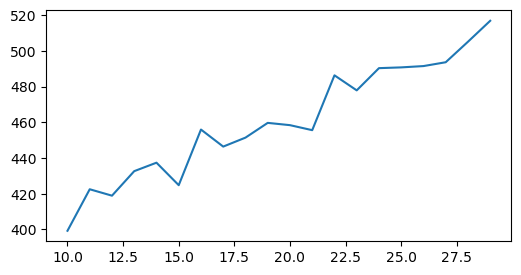

In [26]:
dep,score=[],[]
for i in range(10,30):
    TR = DecisionTreeRegressor(max_depth=i)
    TR.fit(X_train, Y_train)
    Y_TR=TR.predict(X_test)
    dep.append(i)
    score.append(mean_squared_error(Y_test, Y_TR)**(1/2))	#Массив значений √MSE
plt.rcParams['figure.figsize']=6,3
plt.plot(dep, score)